# 분류, 군집 연습문제
## 문제 1 (분류)
- 아래의 주소는 오랜지와 자몽의 특성을 조사한 데이터셋을 내려받을 수 있는 웹 페이지이다
> https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

|변수|설명|구분|
|--|--|--|
|name|오랜지, 자몽 여부|종속|
|diameter|지름|독립|
|weight|무게|독립|
|red|붉은 색상 정도|독립|
|green|초록 색상 정도|독립|
|blue|파란 색상 정도|독립|

이 데이터셋을 활용하여 오랜지와 자몽을 분류할 수 있는 모델을 구성하고 성능 측정 결과를 제시하시오
> 대부분의 데이터는 허구로 작성된 잘 정제된 것이므로 높은 스코어가 나타날 것 입니다.

## 1. 패키지 참조

In [85]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot as plt

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier
# 분류 결과 평가를 위한 패키지
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# 군집 알고리즘 관련 패키지
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# 군집 결과 평가를 위한 패키지
from sklearn.metrics import silhouette_score

## 2. 데이터 가져오기

In [86]:
origin = read_csv('13_연습_citrus.csv')
print(origin.info())
origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


> 종속 변수 라벨링 필요, 독립변수들 (값이 상이하기 때문에) 표준화 필요

## 3. 데이터 전처리
### 1) 데이터 살펴보기

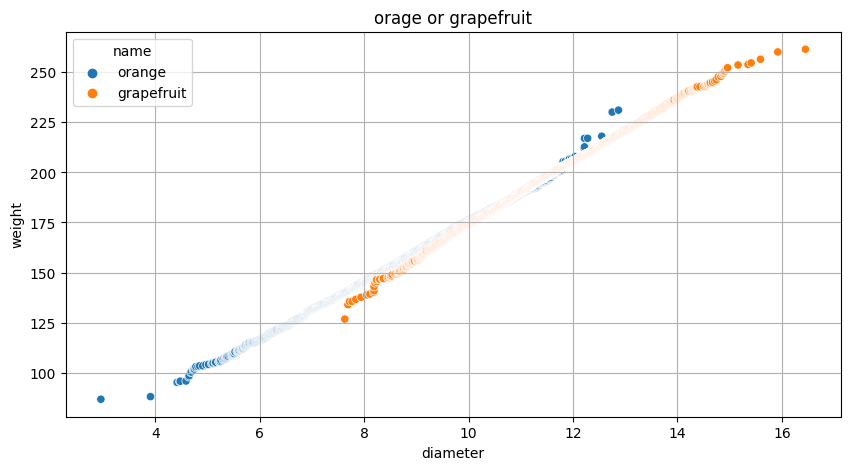

In [87]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=origin, 
               x='diameter',
               y='weight',
               hue = 'name')
plt.title('orage or grapefruit')
plt.xlabel('diameter')
plt.ylabel('weight')
plt.grid()
plt.show()
plt.close()

In [88]:
labels = origin['name'].unique()
labels

array(['orange', 'grapefruit'], dtype=object)

In [89]:
origin['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

### 2) 종속 변수 라벨링

In [90]:
df1 = origin.copy()
df1['name'] = df1['name'].map({'orange':0, 'grapefruit':1})
df1

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


### 3) 종속 독립 변수 분리

In [91]:
x_df1 = df1.drop('name', axis=1)
y_df = DataFrame(df1['name'])
# x_df1
# y_df

### 4) 독립 변수 표준화

In [92]:
scaler = MinMaxScaler()
x_df2 = DataFrame(scaler.fit_transform(x_df1), columns = x_df1.columns)
x_df2

,diameter,weight,red,green,blue
0,0.000000,0.000000,0.740260,0.635294,0.000000
1,0.070423,0.007382,0.662338,0.552941,0.018519
2,0.108228,0.048126,0.532468,0.588235,0.000000
3,0.111935,0.050587,0.623377,0.588235,0.037037
4,0.112676,0.051502,0.597403,0.482353,0.129630
...,...,...,...,...,...
9995,0.918458,0.956395,0.441558,0.541176,0.333333
9996,0.922906,0.960858,0.428571,0.435294,0.092593
9997,0.936249,0.971330,0.688312,0.600000,0.333333
9998,0.960712,0.992160,0.350649,0.482353,0.166667


### 5) 표준화 된 값들 데이터프레임화

In [93]:
df_std = x_df2.copy()
df_std.insert(0, 'name', y_df)
df_std

,name,diameter,weight,red,green,blue
0,0,0.000000,0.000000,0.740260,0.635294,0.000000
1,0,0.070423,0.007382,0.662338,0.552941,0.018519
2,0,0.108228,0.048126,0.532468,0.588235,0.000000
3,0,0.111935,0.050587,0.623377,0.588235,0.037037
4,0,0.112676,0.051502,0.597403,0.482353,0.129630
...,...,...,...,...,...,...
9995,1,0.918458,0.956395,0.441558,0.541176,0.333333
9996,1,0.922906,0.960858,0.428571,0.435294,0.092593
9997,1,0.936249,0.971330,0.688312,0.600000,0.333333
9998,1,0.960712,0.992160,0.350649,0.482353,0.166667


## 4. K-NN 분류기 만들기
### 1) 분류기 만들기
- 최적의 `k`값을 생성하기 위해서는 k가 `1 ~ 데이터수` (10000건)까지 반복하면서 최적의 k값을 찾아야 하지만 실행속도, 시간 등을 고려하여 k의 최댓값을 10으로 제한함

In [94]:
k_range = range(1, 11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn,
                            x_df2,
                            y_df,
                            cv=10,
                            scoring='accuracy')
    k_scores.append(score.mean())

k_scores

[0.8181999999999998,
 0.8225999999999999,
 0.8471,
 0.8489000000000001,
 0.8571,
 0.8606999999999999,
 0.8623,
 0.8647,
 0.8674,
 0.8694000000000001]

### 2) 가장 큰 정확도와 그에 대한 k 값

In [95]:
max_index = k_scores.index(max(k_scores))
max_index
print('최대 정확도: {0:.3f}, 최대 정확도를 갖는 k: {1}'.format(max(k_scores), max_index+1))

최대 정확도: 0.869, 최대 정확도를 갖는 k: 10


### 3) 최적의 k값을 적용한 K-NN 분류기 만들기

In [96]:
knn = KNeighborsClassifier(n_neighbors=max_index+1)
knn.fit(x_df2, y_df)
y_pred_knn = knn.predict(x_df2)
y_pred_df = DataFrame({'y': y_df.values.flatten(), 'y_pred_knn': y_pred_knn})
y_pred_df

,y,y_pred_knn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9995,1,1
9996,1,1
9997,1,1
9998,1,1


## 5. 결과 평가
### 1) 혼돈행렬

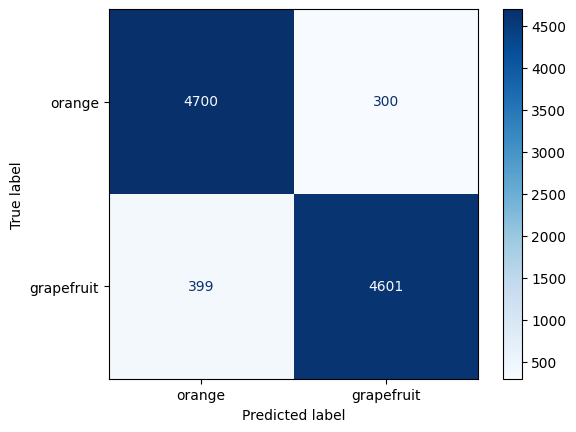

In [97]:
plot = ConfusionMatrixDisplay.from_predictions(y_pred_df['y'], 
                                               y_pred_df['y_pred_knn'],
                                               display_labels=labels,
                                               cmap=plt.cm.Blues)
plt.show()
plt.close()

### 2) 정확도, 정밀도, 재현율, f값 확인하기
- 종속변수가 2개가 넘어가면 정밀도, 재현율, f값은 잘 안 봄!

In [98]:
scores = accuracy_score(y_pred_df['y'], y_pred_df['y_pred_knn'])
print('n_neighbors: {0}, 정확도: {1:.2f}'.format(k, scores))

scores = precision_score(y_pred_df['y'], y_pred_df['y_pred_knn'])
print('n_neighbors: {0}, 정밀도: {1:.2f}'.format(k, scores))

scores = recall_score(y_pred_df['y'], y_pred_df['y_pred_knn'])
print('n_neighbors: {0}, 재현율: {1:.2f}'.format(k, scores))

scores = f1_score(y_pred_df['y'], y_pred_df['y_pred_knn'])
print('n_neighbors: {0}, f값: {1:.2f}'.format(k, scores))

n_neighbors: 10, 정확도: 0.93
n_neighbors: 10, 정밀도: 0.94
n_neighbors: 10, 재현율: 0.92
n_neighbors: 10, f값: 0.93


## 문제 2 (군집)
- 위 데이터에 대한 군집 모델을 구현하시오
- 그 후 임의의 데이터에 대해 분류 결과와 군집 결과가 동일한지 확인하시오

## 1. 패키지 참조
> 앞 문제에서 함
## 2. 데이터 가져오기
> 앞 문제에서 함
## 3. 데이터 전처리
### 1) 종속변수 라벨링
> 앞 문제에서 함
### 2) 독립변수 종속변수 분리
> 앞 문제에서 함
### 3) 데이터 표준화
> 앞 문제에서 함

In [99]:
독립변수_list = list(x_df2.columns)
독립변수_list

['diameter', 'weight', 'red', 'green', 'blue']

In [100]:
x_df2

,diameter,weight,red,green,blue
0,0.000000,0.000000,0.740260,0.635294,0.000000
1,0.070423,0.007382,0.662338,0.552941,0.018519
2,0.108228,0.048126,0.532468,0.588235,0.000000
3,0.111935,0.050587,0.623377,0.588235,0.037037
4,0.112676,0.051502,0.597403,0.482353,0.129630
...,...,...,...,...,...
9995,0.918458,0.956395,0.441558,0.541176,0.333333
9996,0.922906,0.960858,0.428571,0.435294,0.092593
9997,0.936249,0.971330,0.688312,0.600000,0.333333
9998,0.960712,0.992160,0.350649,0.482353,0.166667


In [104]:
독립변수_list = list(x_df2.columns)
print('각 열의 평균', x_df2[독립변수_list[0]].mean(), x_df2[독립변수_list[1]].mean(), x_df2[독립변수_list[2]].mean(),
                   x_df2[독립변수_list[3]].mean(), x_df2[독립변수_list[4]].mean())
print('각 열의 최솟값', x_df2[독립변수_list[0]].min(), x_df2[독립변수_list[1]].min(), x_df2[독립변수_list[2]].min(),
                   x_df2[독립변수_list[3]].min(), x_df2[독립변수_list[4]].min())
print('각 열의 최댓값', x_df2[독립변수_list[0]].max(), x_df2[독립변수_list[1]].max(), x_df2[독립변수_list[2]].max(),
                   x_df2[독립변수_list[3]].max(), x_df2[독립변수_list[4]].max())

각 열의 평균 0.5200656041512232 0.5052405836909871 0.5045168831168831 0.5295364705882353 0.1733925925925926
각 열의 최솟값 0.0 0.0 0.0 0.0 0.0
각 열의 최댓값 1.0 0.9999999999999999 0.9999999999999998 1.0 1.0


## 4. 군집 모델 만들기
### 1) inertia에 의한 최적 군집 수 찾기 및 시각화

In [106]:
iner = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_df2)
    iner.append(kmeans.inertia_)

iner

[691.7543695544969,
 588.3928583210005,
 529.9178122529514,
 486.06255491277216,
 450.26919137065,
 420.90727168302595,
 396.2417121264882,
 375.8943783913277,
 357.2708437052263]

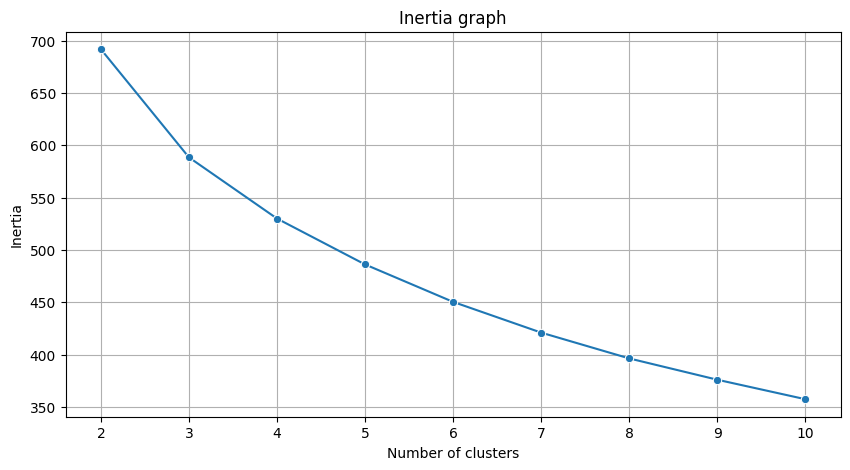

In [107]:
plt.figure(figsize = (10, 5))
sb.lineplot(x=range(2, 11), y=iner, marker='o')
plt.title('Inertia graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()
plt.close()

> 여기서는 분석가가 경사가 완만해지는 지점을 직접 판단해야 된다
>
> 여기서는 4 정도로 판단된다

### 2) silhouette 점수에 의한 최적 군집 수 찾기 및 시각화

In [108]:
silhouette_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state=777)
    kmeans.fit(x_df2)
    y_pred = kmeans.predict(x_df2)
    score = silhouette_score(x_df2, y_pred) # 전체 실루엣 점수의 평균값을 추출
    silhouette_list.append(score)
silhouette_list

[0.3398591427944969,
 0.2666267799759814,
 0.18874217108498187,
 0.1895131980615128,
 0.18543429065453662,
 0.18057879120206324,
 0.18029658797498216,
 0.1762543694949217,
 0.17844116110688224]

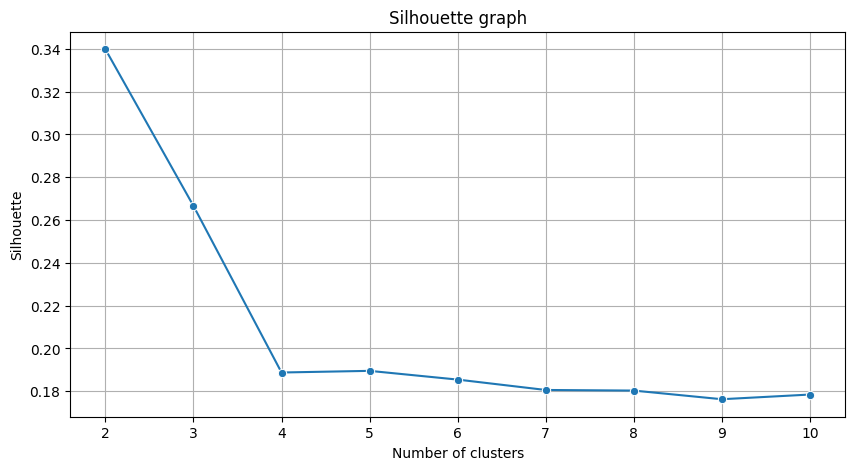

In [109]:
plt.figure(figsize = (10, 5))
sb.lineplot(x=range(2, 11), y=silhouette_list, marker='o')
plt.title('Silhouette graph')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.grid()
plt.show()
plt.close()

> `최적의 클러스터 수는 4`이라고 볼 수 있다.

## 5. 최종 군집 결과
- 실루엣 점수가 가장 높은 `4개의 군집`으로 클러스터링을 수행할 수 있으나 우리는 2개의 분류로 나뉠 것을 알기에 2개로 진행

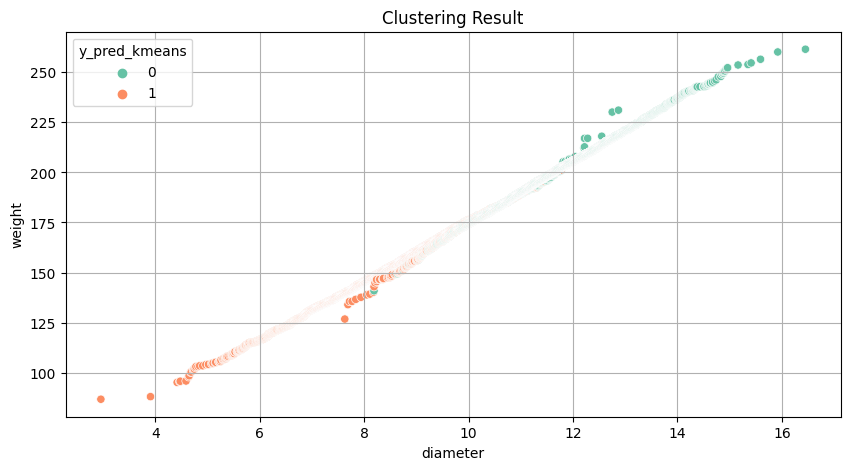

In [113]:
kmeans = KMeans(n_clusters = 2, 
                n_init=10,
                max_iter=300,
                random_state=777)
kmeans.fit(x_df2)
y_pred_kmeans = kmeans.predict(x_df2)

df2 = df1.copy()
df2['y_pred_kmeans'] = y_pred_kmeans

plt.figure(figsize = (10, 5))
sb.scatterplot(data = df2,
               x='diameter',
               y='weight',
               hue='y_pred_kmeans',
               palette='Set2')
plt.title('Clustering Result')
plt.xlabel('diameter')
plt.ylabel('weight')
plt.grid()
plt.show()
plt.close()

In [114]:
y_pred_df['y_pred_knn'] = y_pred_kmeans
y_pred_df


,y,y_pred_knn
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


> 1 과 0 이 바뀌어 있는 이유는, 군집을 할 때 임의의 값을 정하기 때문에 군집은 잘 되었는데 값 설정이 뒤바뀐 것이다 (orange를 1로, Grapefruit를 0 으로)

In [116]:
df3 = df2.copy()
df3['y_pred_knn'] = y_pred_knn
df3

,name,diameter,weight,red,green,blue,y_pred_kmeans,y_pred_knn
0,0,2.96,86.76,172,85,2,1,0
1,0,3.91,88.05,166,78,3,1,0
2,0,4.42,95.17,156,81,2,1,0
3,0,4.47,95.60,163,81,4,1,0
4,0,4.48,95.76,161,72,9,1,0
...,...,...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20,0,1
9996,1,15.41,254.67,148,68,7,0,1
9997,1,15.59,256.50,168,82,20,0,1
9998,1,15.92,260.14,142,72,11,0,1


# K-NN 분류 결과와 K-Means의 군집 결과 - 비교
- 서브플롯 시각화

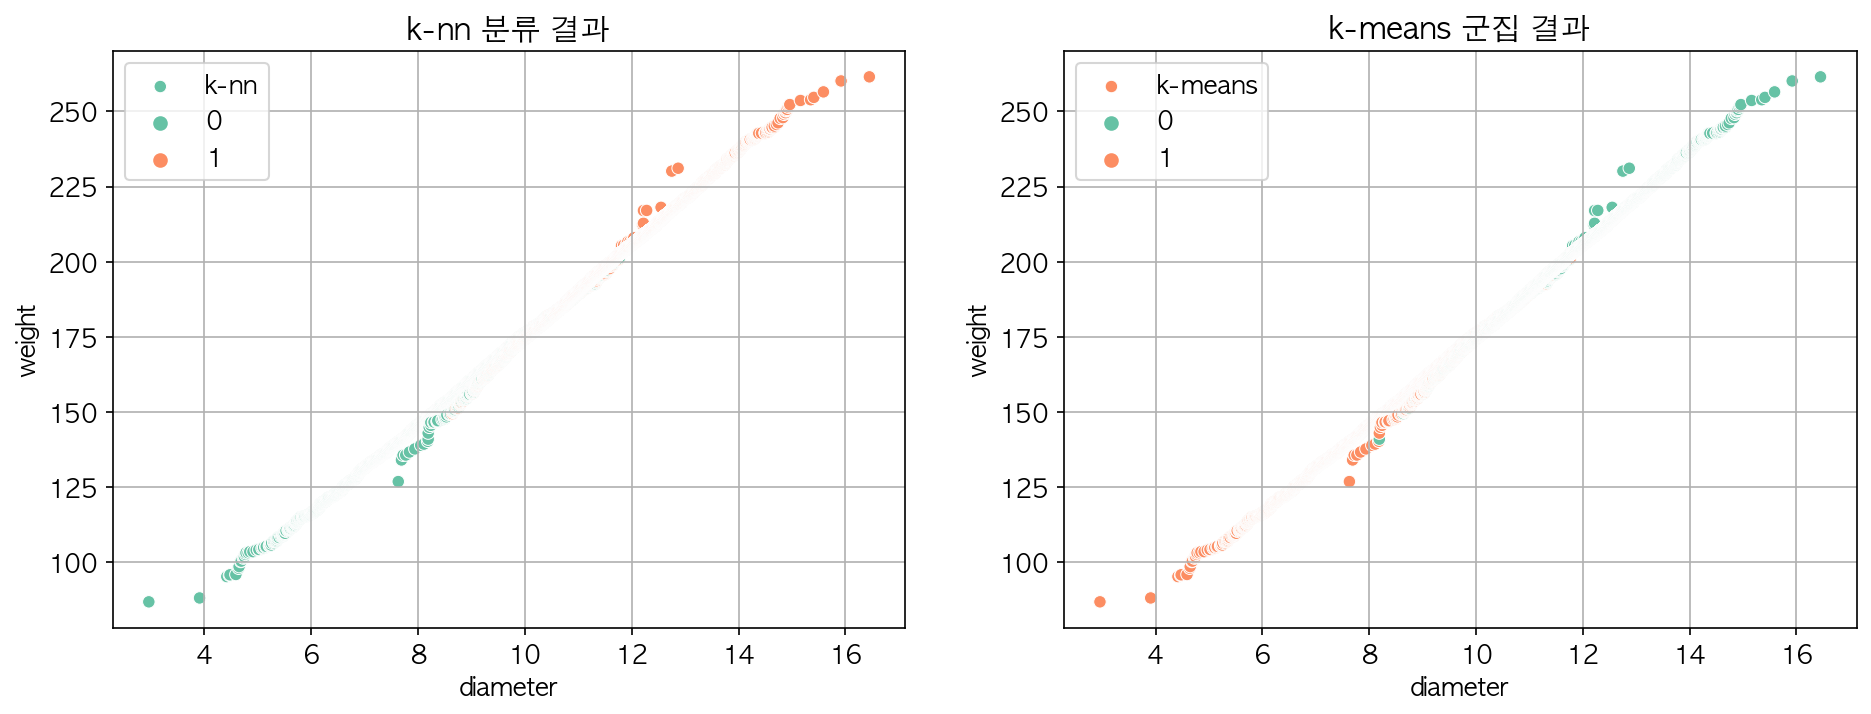

In [119]:
# 학습 결과 시각화

# 그래프 기본설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) k-nn
sb.scatterplot(data = df3,
               x='diameter',
               y='weight',
               hue='y_pred_knn',
               palette='Set2',
               label = 'k-nn',
               ax=ax1)
ax1.set_title('k-nn 분류 결과')
ax1.set_xlabel('diameter')
ax1.set_ylabel('weight')
ax1.grid()
ax1.legend()

# 2) kmeans
sb.scatterplot(data = df3,
               x='diameter',
               y='weight',
               hue='y_pred_kmeans',
               palette='Set2',
               label = 'k-means',
               ax=ax2)
ax2.set_title('k-means 군집 결과')
ax2.set_xlabel('diameter')
ax2.set_ylabel('weight')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

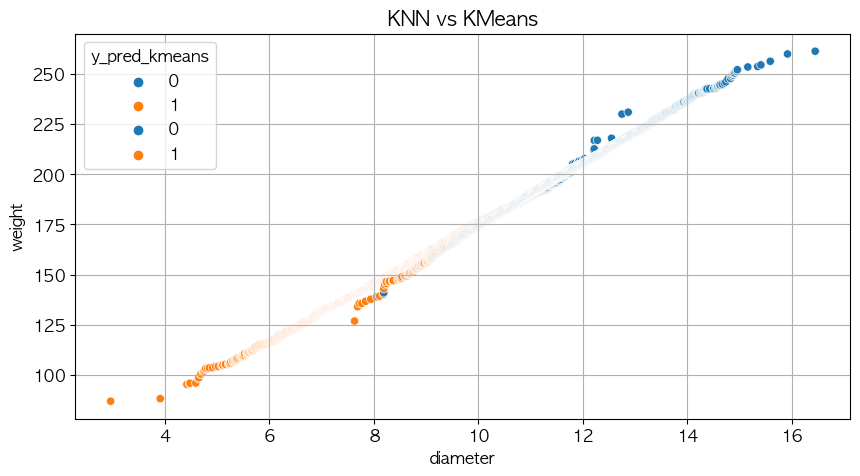

In [122]:
plt.figure(figsize=(10, 5))

sb.scatterplot(data=df3,
               x='diameter',
               y='weight',
               hue='y_pred_knn')
sb.scatterplot(data=df3,
               x='diameter',
               y='weight',
               hue='y_pred_kmeans')

plt.title('KNN vs KMeans')
plt.xlabel('diameter')
plt.ylabel('weight')

plt.grid()
plt.show()
plt.close()
